In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

LOADING MNIST DATASET 

In [5]:
data = tf.keras.datasets.mnist
data

<module 'keras.api.datasets.mnist' from '/opt/anaconda3/lib/python3.12/site-packages/keras/api/datasets/mnist/__init__.py'>

dividing into training and testing datasets

In [7]:
(x_train, y_train), (x_test, y_test) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

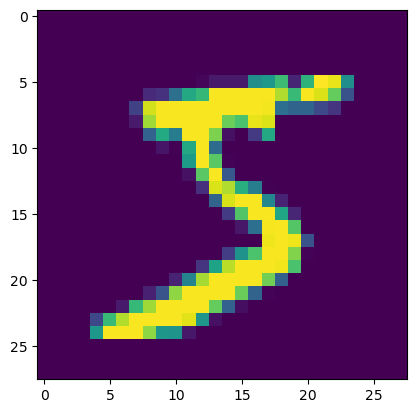

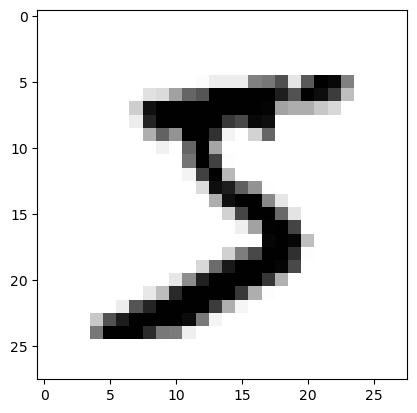

In [9]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

NORMALISING THE DATA

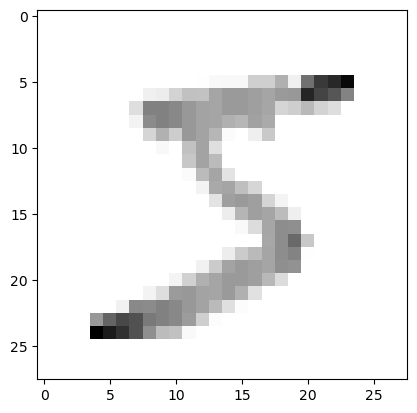

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
x_train_s = np.array(x_train).reshape(-1,28,28,1)
x_test_s = np.array(x_test).reshape(-1,28,28,1)
x_train_s.shape, x_test_s.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [19]:
model = Sequential()

#######first convolutional layer 
model.add(Conv2D(64,(3, 3), input_shape = x_train_s.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#######second convolutional layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

######third convolutional layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

##### fully connected layer -> 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

###### FULLY CONNECTED LAYER -> 2
model.add(Dense(32))
model.add(Activation("relu"))

####### FULLY CONNECTED LAYER -> 3
model.add(Dense(10))
model.add(Activation("softmax"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [23]:
model.fit(x_train_s, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.7839 - loss: 0.6711 - val_accuracy: 0.9623 - val_loss: 0.1208
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9652 - loss: 0.1124 - val_accuracy: 0.9721 - val_loss: 0.0875
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9766 - loss: 0.0739 - val_accuracy: 0.9761 - val_loss: 0.0831
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9818 - loss: 0.0602 - val_accuracy: 0.9813 - val_loss: 0.0667
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9855 - loss: 0.0459 - val_accuracy: 0.9735 - val_loss: 0.0915


In [25]:
test_loss, test_accuracy = model.evaluate(x_test_s, y_test)
print(f"the test loss for 10000 samples is {test_loss}")
print(f"the test accurasy for 10000 samples is {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.1061
the test loss for 10000 samples is 0.08557792007923126
the test accurasy for 10000 samples is 0.9753000140190125


In [26]:
predictions = model.predict([x_test_s])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [27]:
print(predictions)

[[8.5432174e-07 2.6733646e-06 2.4707278e-06 ... 9.9999201e-01
  8.9069960e-09 5.0965645e-07]
 [3.3315908e-05 1.5105678e-05 9.9988675e-01 ... 1.3019829e-06
  6.5402073e-06 7.2503451e-07]
 [2.7570263e-06 9.9984199e-01 4.8826416e-07 ... 2.0396490e-05
  4.7748167e-06 9.8617338e-06]
 ...
 [5.7440101e-08 4.0807145e-06 5.4087341e-08 ... 5.3017839e-06
  2.8619068e-06 1.7367083e-06]
 [2.2247507e-06 7.4135720e-08 1.0084509e-10 ... 4.0114365e-09
  3.1509319e-07 4.2988463e-06]
 [5.7754188e-04 3.5444309e-08 2.8131055e-06 ... 1.3658628e-06
  1.9311959e-05 1.1187894e-04]]


In [28]:
print(np.argmax(predictions[0]))

7


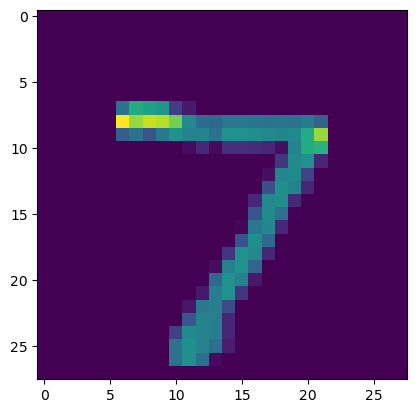

In [36]:
plt.imshow(x_test[0])

In [37]:
import cv2

In [79]:

img = cv2.imread('/Users/sreethanubhuvaneshgk/Desktop/ml_projects/datasets/digit_testing.png')

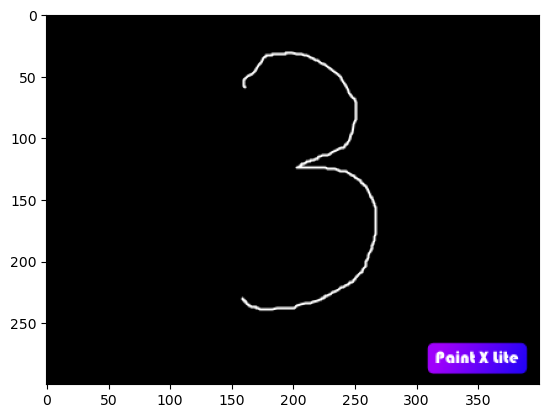

In [80]:
plt.imshow(img)

In [81]:
grey_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey_scale.shape

(300, 400)

In [82]:
resize = cv2.resize(grey_scale, (28, 28), interpolation = cv2.INTER_AREA)
resize.shape

(28, 28)

In [83]:
newimg = tf.keras.utils.normalize(resize, axis = 1)

In [84]:
newimg = np.array(newimg).reshape(-1, 28, 28, 1)
newimg.shape

(1, 28, 28, 1)

In [85]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [86]:
print(np.argmax(predictions))

3
